# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
# Atualmente, este é meu bloco fixo de importações
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests as rq
%matplotlib inline

# Carregando o arquivo diretamente em um df
base_original = pd.read_csv("Base_m10.csv")
base_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

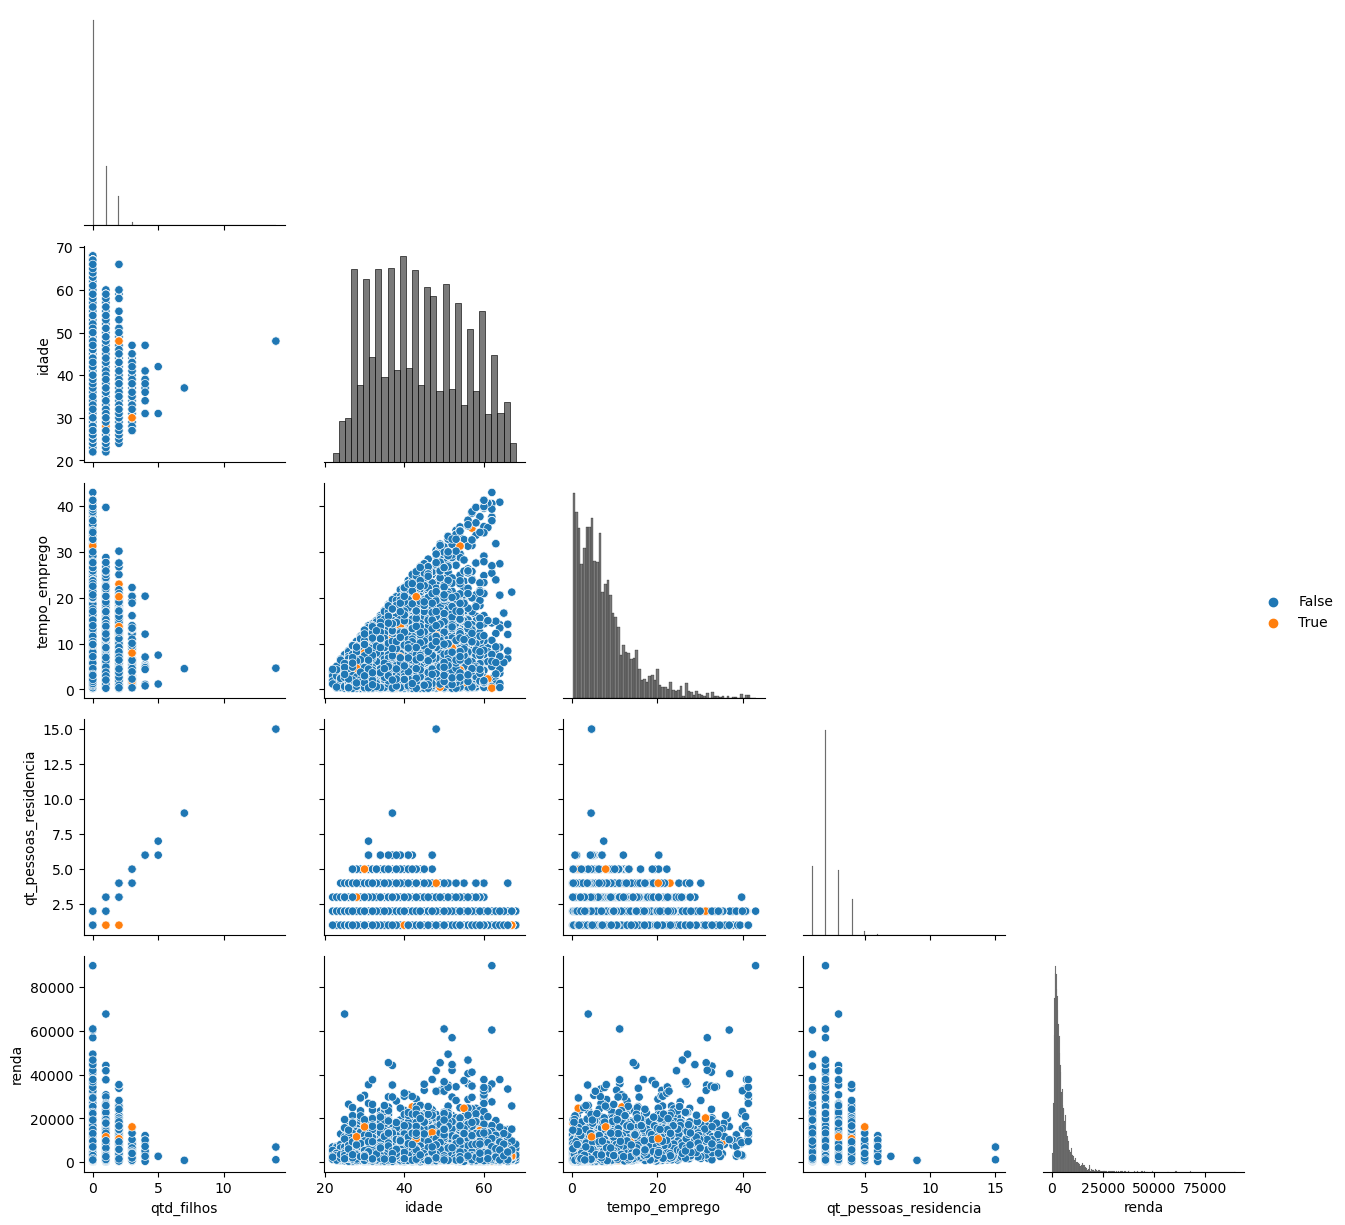

In [2]:
# Gerando o gráfico combinado "Matriz de Dispersão" com as variáveis numéricas
variaveis = ["qtd_filhos", "idade", "tempo_emprego", "qt_pessoas_residencia", "renda"]
f = sns.PairGrid(base_original, hue="mau", vars=variaveis, diag_sharey=False, corner=True)
f.map_diag(sns.histplot, hue=None, color=".3")
f.map_lower(sns.scatterplot)
f.add_legend(title="", adjust_subtitles=True)

<Figure size 1000x800 with 0 Axes>

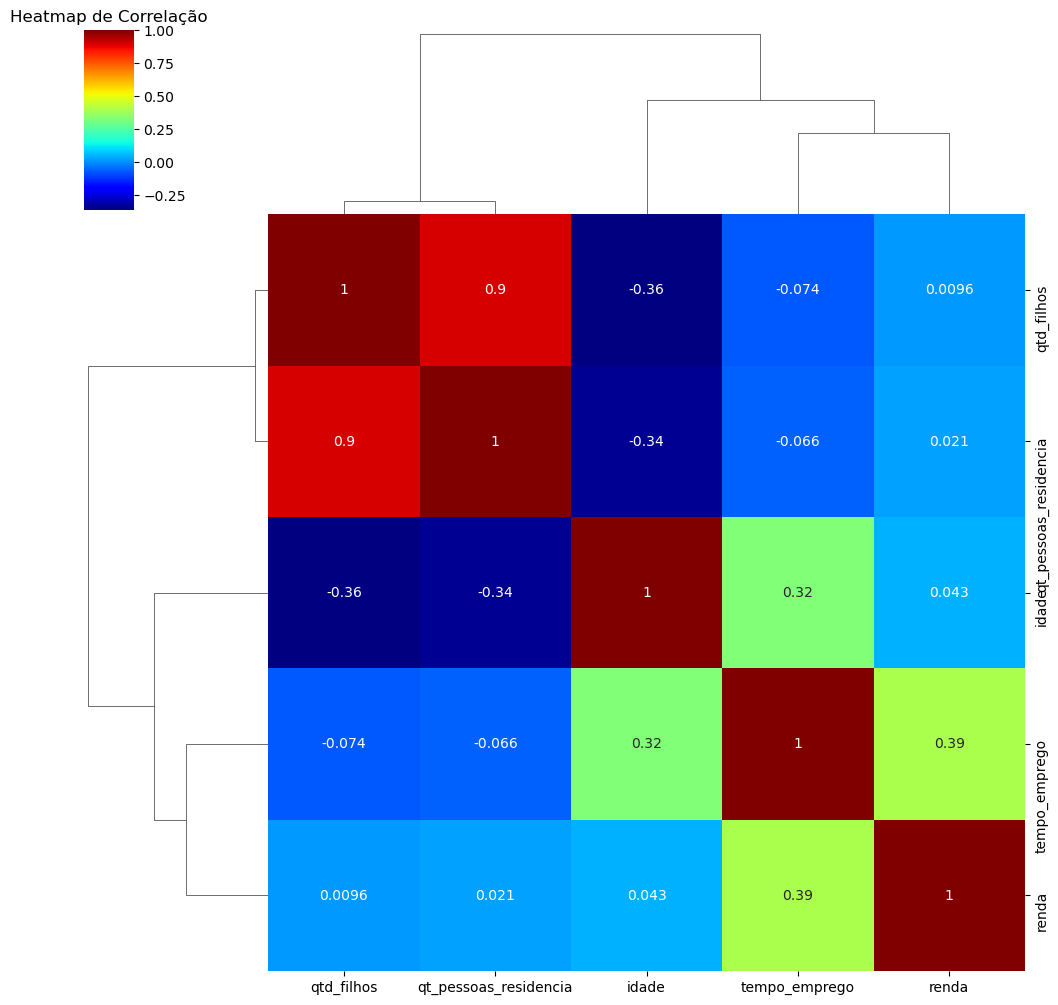

In [3]:
variaveis_num = base_original[variaveis]

# Calcular a matriz de correlação
matriz_correlacao = variaveis_num.corr()

# Configurar o heatmap
plt.figure(figsize=(10, 8))
sns.clustermap(matriz_correlacao, annot=True, cmap="jet", figsize=(10, 10))

# Exibir o heatmap
plt.title("Heatmap de Correlação")
plt.show()

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

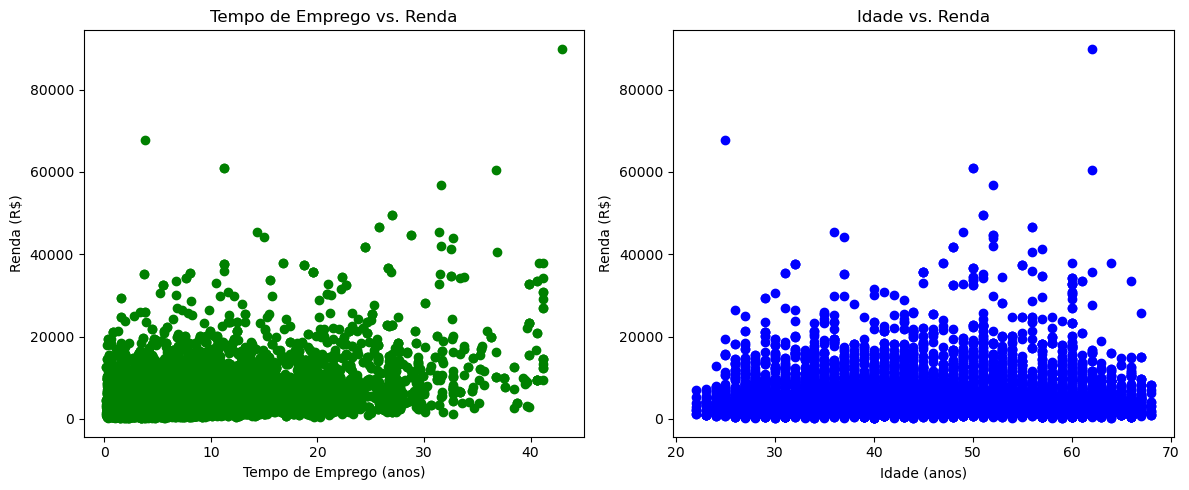

In [4]:
# Gerando os gráficos simultaneamente das variáveis que apresentaram maior correlação com a renda
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de dispersão entre "qtd_filhos" e "renda"
axs[0].scatter(base_original["tempo_emprego"], base_original["renda"], color="green")
axs[0].set_xlabel("Tempo de Emprego (anos)")
axs[0].set_ylabel("Renda (R$)")
axs[0].set_title("Tempo de Emprego vs. Renda")

# Gráfico de dispersão entre "qt_pessoas_residencia" e "renda"
axs[1].scatter(base_original["idade"], base_original["renda"], color="blue")
axs[1].set_xlabel("Idade (anos)")
axs[1].set_ylabel("Renda (R$)")
axs[1].set_title("Idade vs. Renda")

plt.tight_layout()
plt.show()

3) Na sua aopinião, há outliers na variável renda?

Definitivamente. Na matriz de dispersão, a renda x renda mostra que seus dados se concentram de 0 a 25k, porém, ao olhar para renda frente as outras variáveis, notamos que sempre há pelo menos 01 dado ao extremo oposto do gráfico, isolado.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

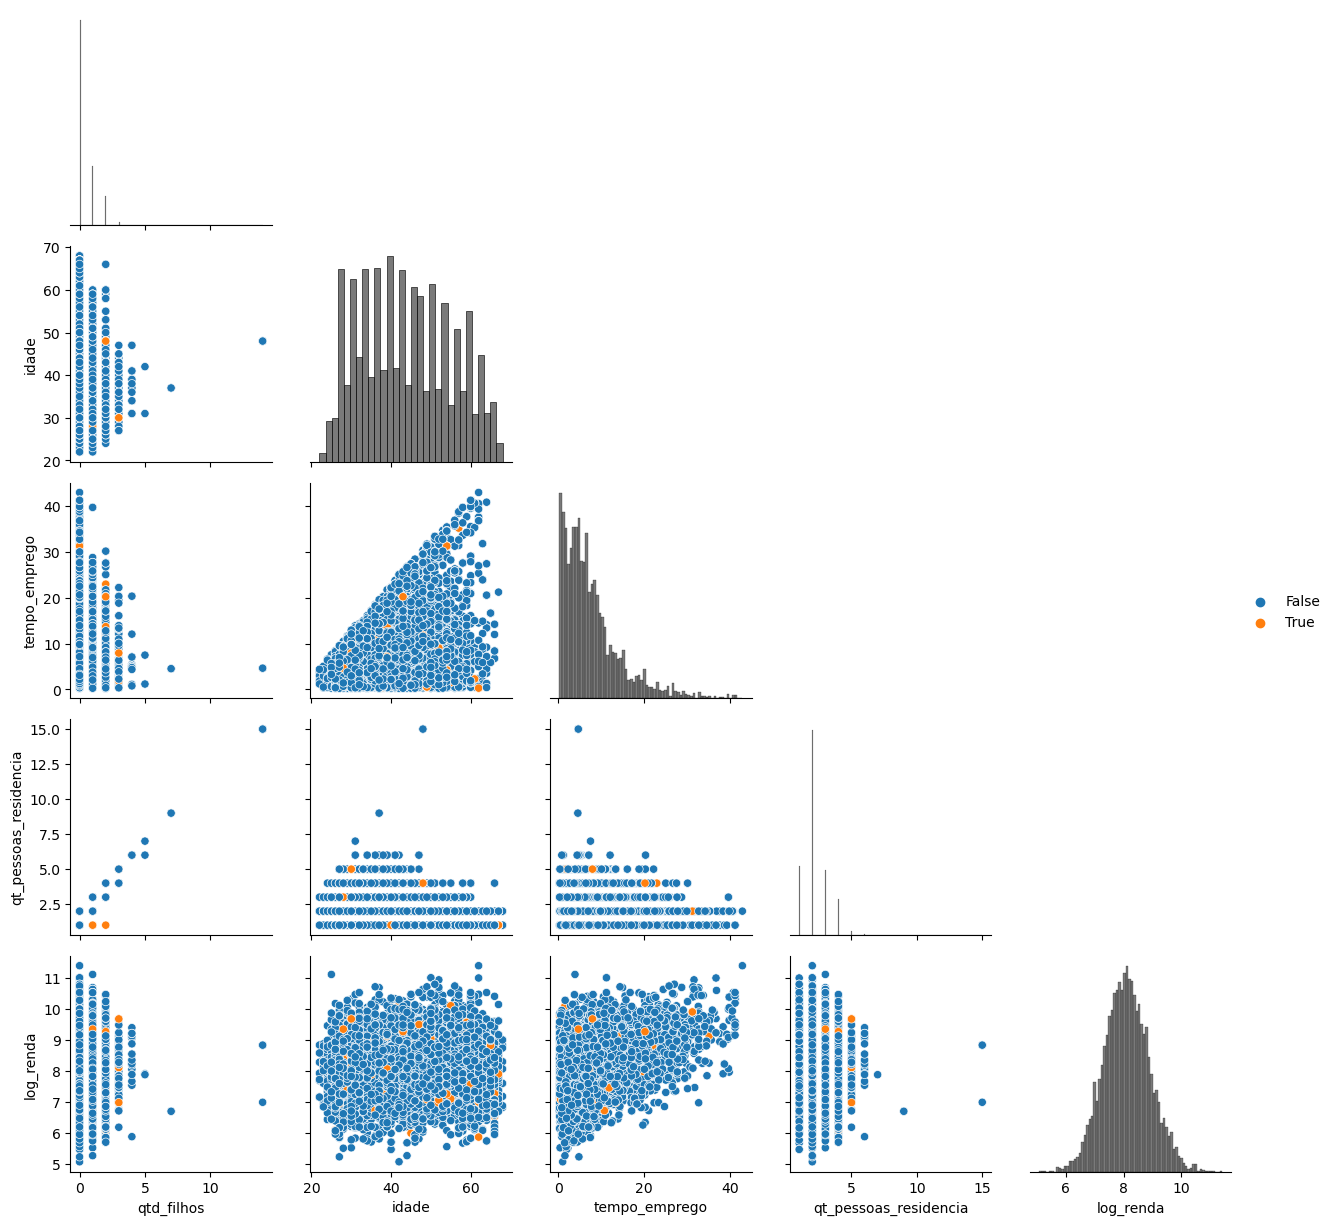

In [5]:
base_com_log_renda = base_original.copy()
base_com_log_renda["log_renda"] = np.log(base_com_log_renda["renda"])

variaveis = ["qtd_filhos", "idade", "tempo_emprego", "qt_pessoas_residencia", "log_renda"]
f = sns.PairGrid(base_com_log_renda, hue="mau", vars=variaveis, diag_sharey=False, corner=True)
f.map_diag(sns.histplot, hue=None, color=".3")
f.map_lower(sns.scatterplot)
f.add_legend(title="", adjust_subtitles=True)

<Figure size 1000x800 with 0 Axes>

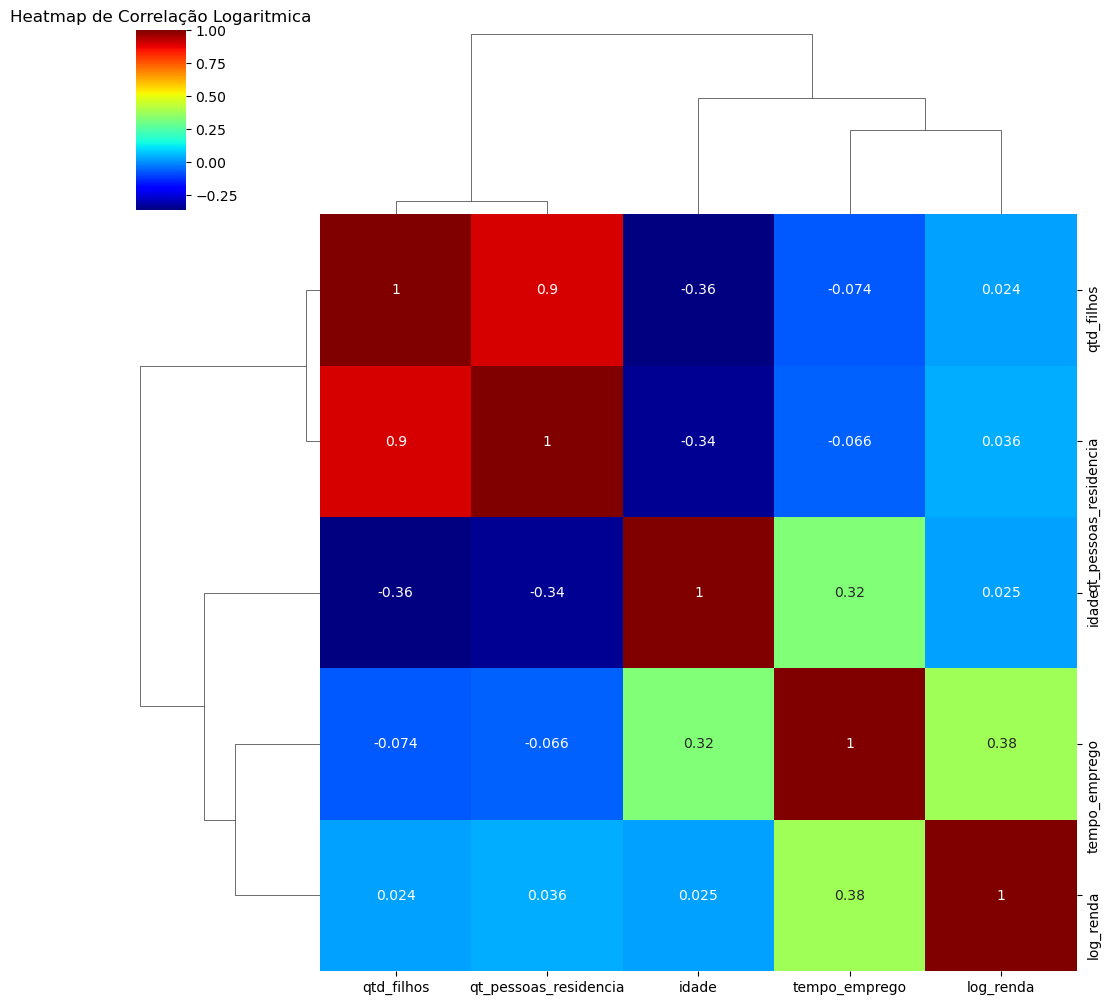

In [6]:
variaveis_num_log = base_com_log_renda[variaveis]

# Calcular a matriz de correlação
matriz_correlacao_log = variaveis_num_log.corr()

# Configurar o heatmap
plt.figure(figsize=(10, 8))
sns.clustermap(matriz_correlacao_log, annot=True, cmap="jet", figsize=(10, 10))

# Exibir o heatmap
plt.title("Heatmap de Correlação Logaritmica")
plt.show()

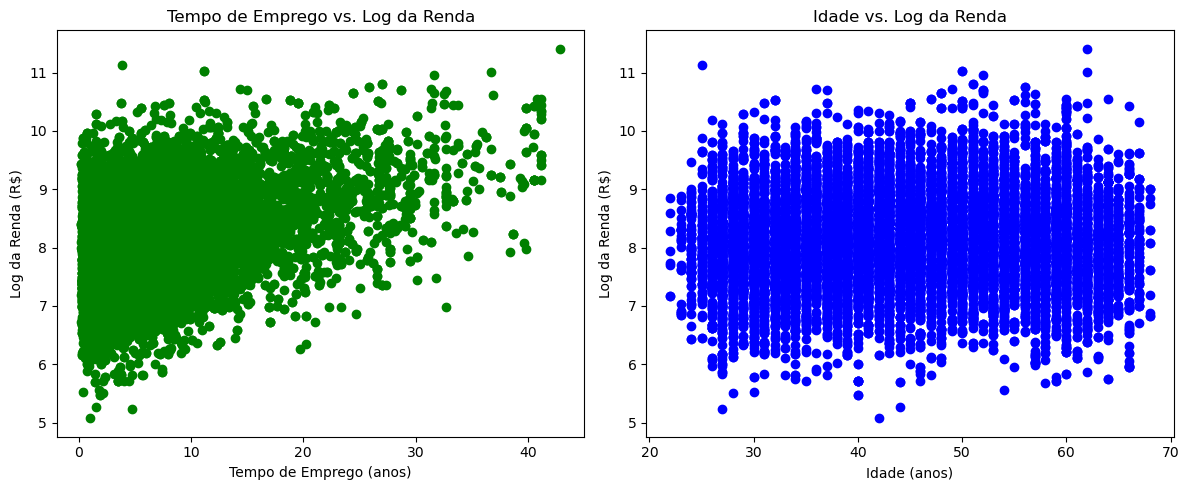

In [7]:
# Gerando os gráficos simultaneamente das variáveis que apresentaram maior correlação com a renda
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de dispersão entre "qtd_filhos" e "renda"
axs[0].scatter(base_com_log_renda["tempo_emprego"], base_com_log_renda["log_renda"], color="green")
axs[0].set_xlabel("Tempo de Emprego (anos)")
axs[0].set_ylabel("Log da Renda (R$)")
axs[0].set_title("Tempo de Emprego vs. Log da Renda")

# Gráfico de dispersão entre "qt_pessoas_residencia" e "renda"
axs[1].scatter(base_com_log_renda["idade"], base_com_log_renda["log_renda"], color="blue")
axs[1].set_xlabel("Idade (anos)")
axs[1].set_ylabel("Log da Renda (R$)")
axs[1].set_title("Idade vs. Log da Renda")

plt.tight_layout()
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [ ]:
Infelizmente, sinto que piorou, pois ao inves de concentrar os dados em alguma faixa/região, acabou dispersando ainda mais.